In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda")
device

device(type='cuda')

In [2]:
df = pd.read_csv('../dataset/Income.csv')
df.info()
# plt.scatter(df.Education, df.Income)
# plt.xlabel('Education')
# plt.ylabel('Income')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Income     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
# 数据预处理 -- 占很大的比例
# X = df.Education.values.reshape(-1,1).astype(np.float32) 
# X = torch.from_numpy(df.Education.values.astype(np.float32))
X = torch.from_numpy(df.Education.values.reshape(-1,1).astype(np.float32))
Y = torch.from_numpy(df.Income.values.reshape(-1,1).astype(np.float32))

In [4]:
%%time
# 初始化训练模型、损失函数和优化方法
model = nn.Linear(1, 1) # 定义一个线性回归模型； output = w@input + b 等价于 model(input)
loss_fn = nn.MSELoss()  # 定义损失函数，均方误差模式
opt = torch.optim.SGD(model.parameters(), lr=0.0001)  # 优化model中的参数， lr=学习速率
# 运行和优化
for epoch in range(3000):
    for x,y in zip(X, Y):
        y_pred = model(x)           # 使用定义的预测模型
        loss = loss_fn(y, y_pred)   # 根据预测结果计算损失
        opt.zero_grad()             # 把变量梯度清0
        loss.backward()             # 求解梯度
        opt.step()                  # 优化模型参数，按照step


CPU times: total: 7.39 s
Wall time: 19.4 s


In [5]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[4.6096]], requires_grad=True)
Parameter containing:
tensor([-21.8981], requires_grad=True)


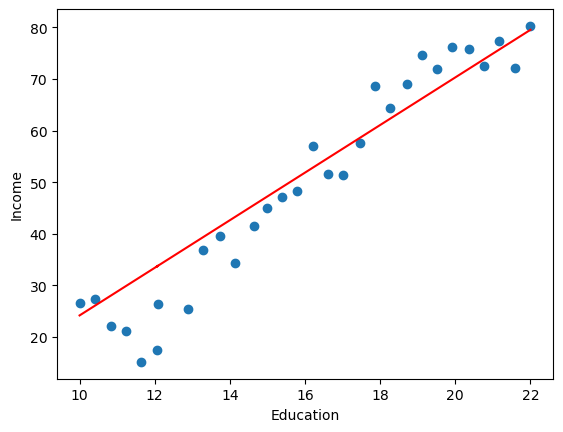

In [6]:
plt.xlabel('Education')
plt.ylabel('Income')
plt.scatter(df.Education, df.Income)
plt.plot( X.numpy(), model(X).data.numpy(), c='r' )
plt.show()